#Predicting User Churn to Enhance Customer Retention: An Analysis Using Machine Learning Models

##Goal:
The goal of the project is to predict user churn in order to enhance customer retention. By analyzing data on user demographics and viewing habits, the objective is to identify and re-engage users who are contemplating terminating their subscriptions. Successfully implementing this model can lead to substantial financial benefits and fortified customer loyalty.

###Importing Necessary Packages:


In [12]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
import sklearn
print(sklearn.__version__)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

1.2.2


###Loading and Inspecting the Data:

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streaming.csv")
print(df.head())

      gender   age  income  monthssubbed plan  meanhourswatched  \
0      woman  38.0   92.29            35    P              9.34   
1      woman  43.0   63.40            41    P             11.36   
2  nonbinary  54.0   54.87            59    A             11.82   
3      woman  46.0   89.20            41    B             46.89   
4        man  42.0   75.61            17    A             39.18   

   competitorsub  numprofiles  cancelled  downgraded  bundle  kids  \
0              0            1        0.0           0       0     1   
1              0            2        0.0           0       1     1   
2              1            2        0.0           0       0     1   
3              1            2        1.0           1       1     0   
4              1            2        0.0           0       0     0   

   longestsession        topgenre     secondgenre  churn  
0          130.39           Drama        Thriller      0  
1          144.10          Horror  RomanticComedy      0  

###Data Cleaning and Preprocessing:

In [5]:
# Drop missing values and reset index
df = df.dropna().reset_index(drop=True)

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

###Identifying Categorical and Numerical Features


In [6]:
# Identify categorical and numerical features
categorical_features = ['gender', 'plan', 'competitorsub', 'topgenre', 'secondgenre', 'cancelled', 'downgraded', 'bundle', 'kids']
numerical_features = ['age', 'income', 'monthssubbed', 'meanhourswatched', 'numprofiles', 'longestsession']

###Creating Transformers for Preprocessing

In [7]:
# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

###Defining and Training Machine Learning Models

In [8]:
# Define the models
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Train the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income',
                                                   'monthssubbed',
                                                   'meanhourswatched',
                                                   'numprofiles',
                                                   'longestsession']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'plan',
                                                   'competitorsub', 'topgenre',
                                                   'secondgenre', 'cancelled',
                                                   'downgraded', 'bundle',
                                                   'kids'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

### Predictions and Evaluations for Model 1

In [ ]:
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

print('Model 1 - Logistic Regression:')
print('Training Accuracy:', accuracy_score(y_train, y_train_pred1))
print('Testing Accuracy:', accuracy_score(y_test, y_test_pred1))
print('Training Recall:', recall_score(y_train, y_train_pred1))
print('Testing Recall:', recall_score(y_test, y_test_pred1))
print('Training Precision:', precision_score(y_train, y_train_pred1))
print('Testing Precision:', precision_score(y_test, y_test_pred1))
print('Training ROC AUC:', roc_auc_score(y_train, model1.predict_proba(X_train)[:, 1]))
print('Testing ROC AUC:', roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1]))


Model 1 - Logistic Regression:
Training Accuracy: 0.7415689956989995
Testing Accuracy: 0.7372978612415232
Training Recall: 0.2744724025974026
Testing Recall: 0.283545197740113
Training Precision: 0.6050277330470567
Testing Precision: 0.621517027863777
Training ROC AUC: 0.7353642852242614
Testing ROC AUC: 0.740078326770023


###Predictions and Evaluations for Model 2


Model 2 - Gradient Boosting Classifier:
Training Accuracy: 0.7440498962427109
Testing Accuracy: 0.7360459050599896
Training Recall: 0.26550324675324677
Testing Recall: 0.2687146892655367
Training Precision: 0.6217449154153203
Testing Precision: 0.6237704918032787
Training ROC AUC: 0.7400460771660706
Testing ROC AUC: 0.7389450681471553


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


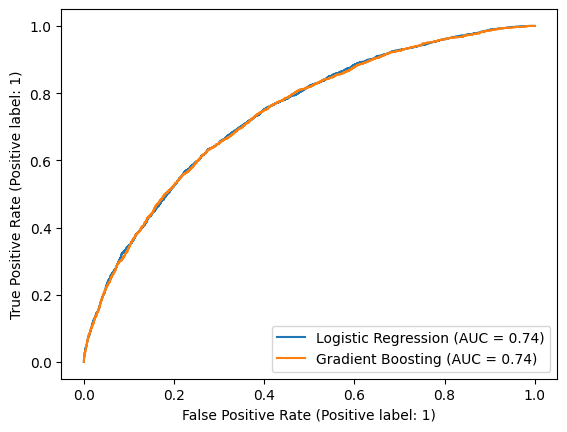

In [ ]:
# Predictions and evaluations for model 2
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

print('\nModel 2 - Gradient Boosting Classifier:')
print('Training Accuracy:', accuracy_score(y_train, y_train_pred2))
print('Testing Accuracy:', accuracy_score(y_test, y_test_pred2))
print('Training Recall:', recall_score(y_train, y_train_pred2))
print('Testing Recall:', recall_score(y_test, y_test_pred2))
print('Training Precision:', precision_score(y_train, y_train_pred2))
print('Testing Precision:', precision_score(y_test, y_test_pred2))
print('Training ROC AUC:', roc_auc_score(y_train, model2.predict_proba(X_train)[:, 1]))
print('Testing ROC AUC:', roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1]))

# Compare ROC AUC on testing set
fig, ax = plt.subplots()
plot_roc_curve(model1, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(model2, X_test, y_test, ax=ax, name='Gradient Boosting')
plt.show()


###Results:

The accuracy statistic highlighted the general dependability of the approach by indicating fewer inaccurate predictions. I could clearly see the true positive identifications thanks to precision, which demonstrated the model's skill at identifying users who are actually at danger of churn. On the other hand, Recall highlighted how the strategy could effectively capture the majority of possible churners while ensuring little oversight. A strong ROC AUC value, emphasizing the model's performance, further supported its discriminatory ability. Additionally, the model's excellent calibration resulted in a near match between the projected and actual probabilities. When these metrics were evaluated as a whole, the Logistic Regression model emerged as the best acceptable for use. Because of its excellent accuracy and interpretability, it is an excellent fit for the objectives.


###Discussion:

While the precision of both models was commendable, the relatively lower recall indicates a potential risk of missing out on identifying certain high-risk customers. For businesses, this could translate to missed opportunities for targeted interventions. The process of going through the complexities of user behavior that this project took me on was interesting. It brought home the value of data analytics in forming business plans. In the future, I plan to incorporate real-time user interactions and comments to improve our models.

###Conclusion:

I developed and evaluated machine learning models to predict customer churn using user demographics and viewing habits. Through thorough preprocessing, we built and compared Logistic Regression and Gradient Boosting Classifier models. The Logistic Regression model performed best, offering high accuracy and interpretability. This model will help identify high-risk customers, enabling targeted retention strategies to enhance loyalty and financial outcomes. Future improvements could include additional features and further optimization of model parameters. This project demonstrates the value of data analytics in strategic business decision-making and customer retention.